# Image Transparency and overlays

In [1]:
%mavenRepo clojars https://clojars.org/repo/
%maven origami:origami:4.7.0-5

In [2]:
import java.io.IOException;
import java.util.ArrayList;
import java.util.List;

import org.opencv.core.*;
import org.opencv.highgui.HighGui;
import org.opencv.imgcodecs.Imgcodecs;
import origami.Origami;
Origami.init()

Loading: opencv_java470
Loaded: opencv_java470


In [3]:
void drawTransparency(Mat frame, Mat transp, int xPos, int yPos) {
        List<Mat> layers = new ArrayList<Mat>();
        Core.split(transp, layers);
        Mat mask = layers.remove(3);
        Core.merge(layers, transp);
        Mat submat = frame.submat(yPos, yPos + transp.rows(), xPos, xPos + transp.cols());
        transp.copyTo(submat, mask);
}

void weightedTransparency(Mat frame, Mat transp, int xPos, int yPos) {
        List<Mat> layers = new ArrayList<Mat>();
        Core.split(transp, layers);
        Mat mask = layers.remove(3);
        Core.bitwise_not(mask, mask);
        Mat merged = new Mat();
        Core.merge(layers, merged);
        Mat submat = frame.submat(yPos, yPos + transp.rows(), xPos, xPos + transp.cols());
        Mat source = submat.clone();
        Core.addWeighted(merged, 0.5, source, 0.5, 0, submat);
        source.copyTo(submat, mask); 
}

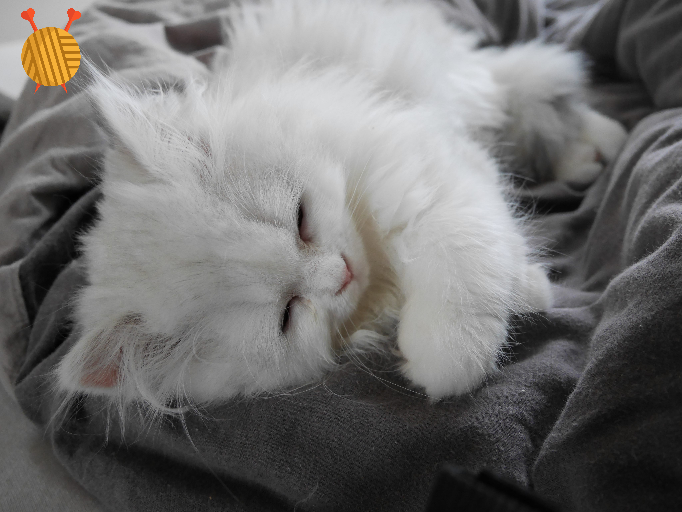

In [4]:
Mat marcel = Imgcodecs.imread("../data/marcel2019.jpg");
Mat whool = Imgcodecs.imread("../data/tp/whool.png", Imgcodecs.IMREAD_UNCHANGED);
drawTransparency(marcel, whool, 50, 50);
Mat petitMarcel = Origami.resize(marcel, 6);
Origami.matToBufferedImage(petitMarcel);

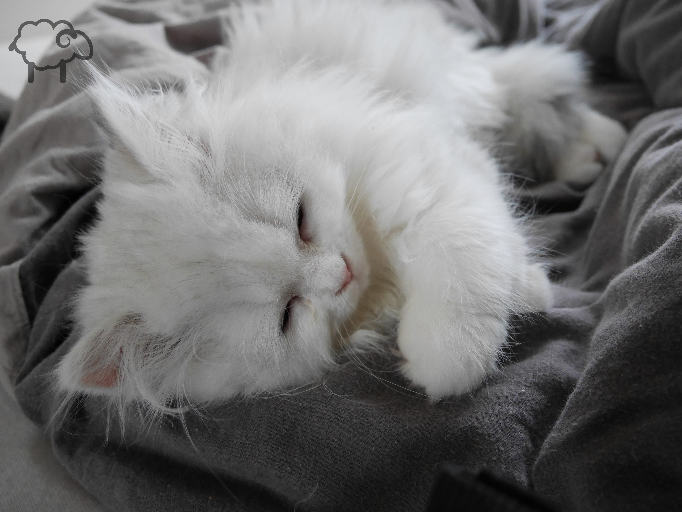

In [5]:
Mat marcel = Imgcodecs.imread("../data/marcel2019.jpg");
Mat whool = Imgcodecs.imread("../data/tp/sheep.png", Imgcodecs.IMREAD_UNCHANGED);
weightedTransparency(marcel, whool, 50, 50);
Mat petitMarcel = Origami.resize(marcel, 6);
Origami.matToBufferedImage(petitMarcel);